In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
modern_renewable_prod = pd.read_csv('modern-renewable-prod.csv')

In [4]:
modern_renewable_prod.tail()

,Entity,Code,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
8956,Zimbabwe,ZWE,2017,0.0,3.97,0.01,0.32
8957,Zimbabwe,ZWE,2018,0.0,5.05,0.02,0.39
8958,Zimbabwe,ZWE,2019,0.0,4.17,0.03,0.38
8959,Zimbabwe,ZWE,2020,0.0,3.81,0.03,0.35
8960,Zimbabwe,ZWE,2021,0.0,4.00,0.04,0.38


In [4]:
modern_renewable_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8961 non-null   object 
 1   Code                                        7354 non-null   object 
 2   Year                                        8961 non-null   int64  
 3   Electricity from wind - TWh                 8000 non-null   float64
 4   Electricity from hydro - TWh                8863 non-null   float64
 5   Electricity from solar - TWh                7956 non-null   float64
 6   Other renewables including bioenergy - TWh  8148 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 490.2+ KB


In [5]:
modern_renewable_prod = modern_renewable_prod.drop('Code', axis=1)
modern_renewable_world = modern_renewable_prod[modern_renewable_prod['Entity'] == 'World']
modern_renewable_world = modern_renewable_world.drop('Entity', axis=1)
modern_renewable_world.head()

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
8837,1965,0.0,923.19806,0.0,17.985231
8838,1966,0.0,983.81696,0.0,19.806007
8839,1967,0.0,1005.74240,0.0,19.986570
8840,1968,0.0,1059.28870,0.0,22.120045
8841,1969,0.0,1121.74240,0.0,23.257965


In [6]:
countries = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom']
modern_renewable_countries = modern_renewable_prod[modern_renewable_prod['Entity'].isin(
    countries)]
modern_renewable_countries_2020 = modern_renewable_countries[
    modern_renewable_countries['Year'] == 2020]
modern_renewable_countries_2020 = modern_renewable_countries_2020.drop(
    'Year', axis=1)

In [9]:
modern_renewable_UK = modern_renewable_prod[modern_renewable_prod['Entity']
                                            == 'United Kingdom']
modern_renewable_UK = modern_renewable_UK[(
    modern_renewable_UK['Year'] >= 2010) & (modern_renewable_UK['Year'] <= 2020)]
modern_renewable_UK = modern_renewable_UK.drop(['Entity', 'Year'], axis=1)
total_sum = modern_renewable_UK.sum(axis=0)
total_sum.index
label = list(total_sum.index)
values = list(total_sum)
explode = (0, 0, 0, 0)

In [7]:
hydro_power_china = modern_renewable_prod[modern_renewable_prod['Entity'] == 'China']
hydro_power_china = hydro_power_china[hydro_power_china['Year'] >= 2000]
hydro_power_china = hydro_power_china[['Year', 'Electricity from hydro - TWh']]
hydro_power_china.head()
str_list = [str(num) for num in list(hydro_power_china['Year'])]

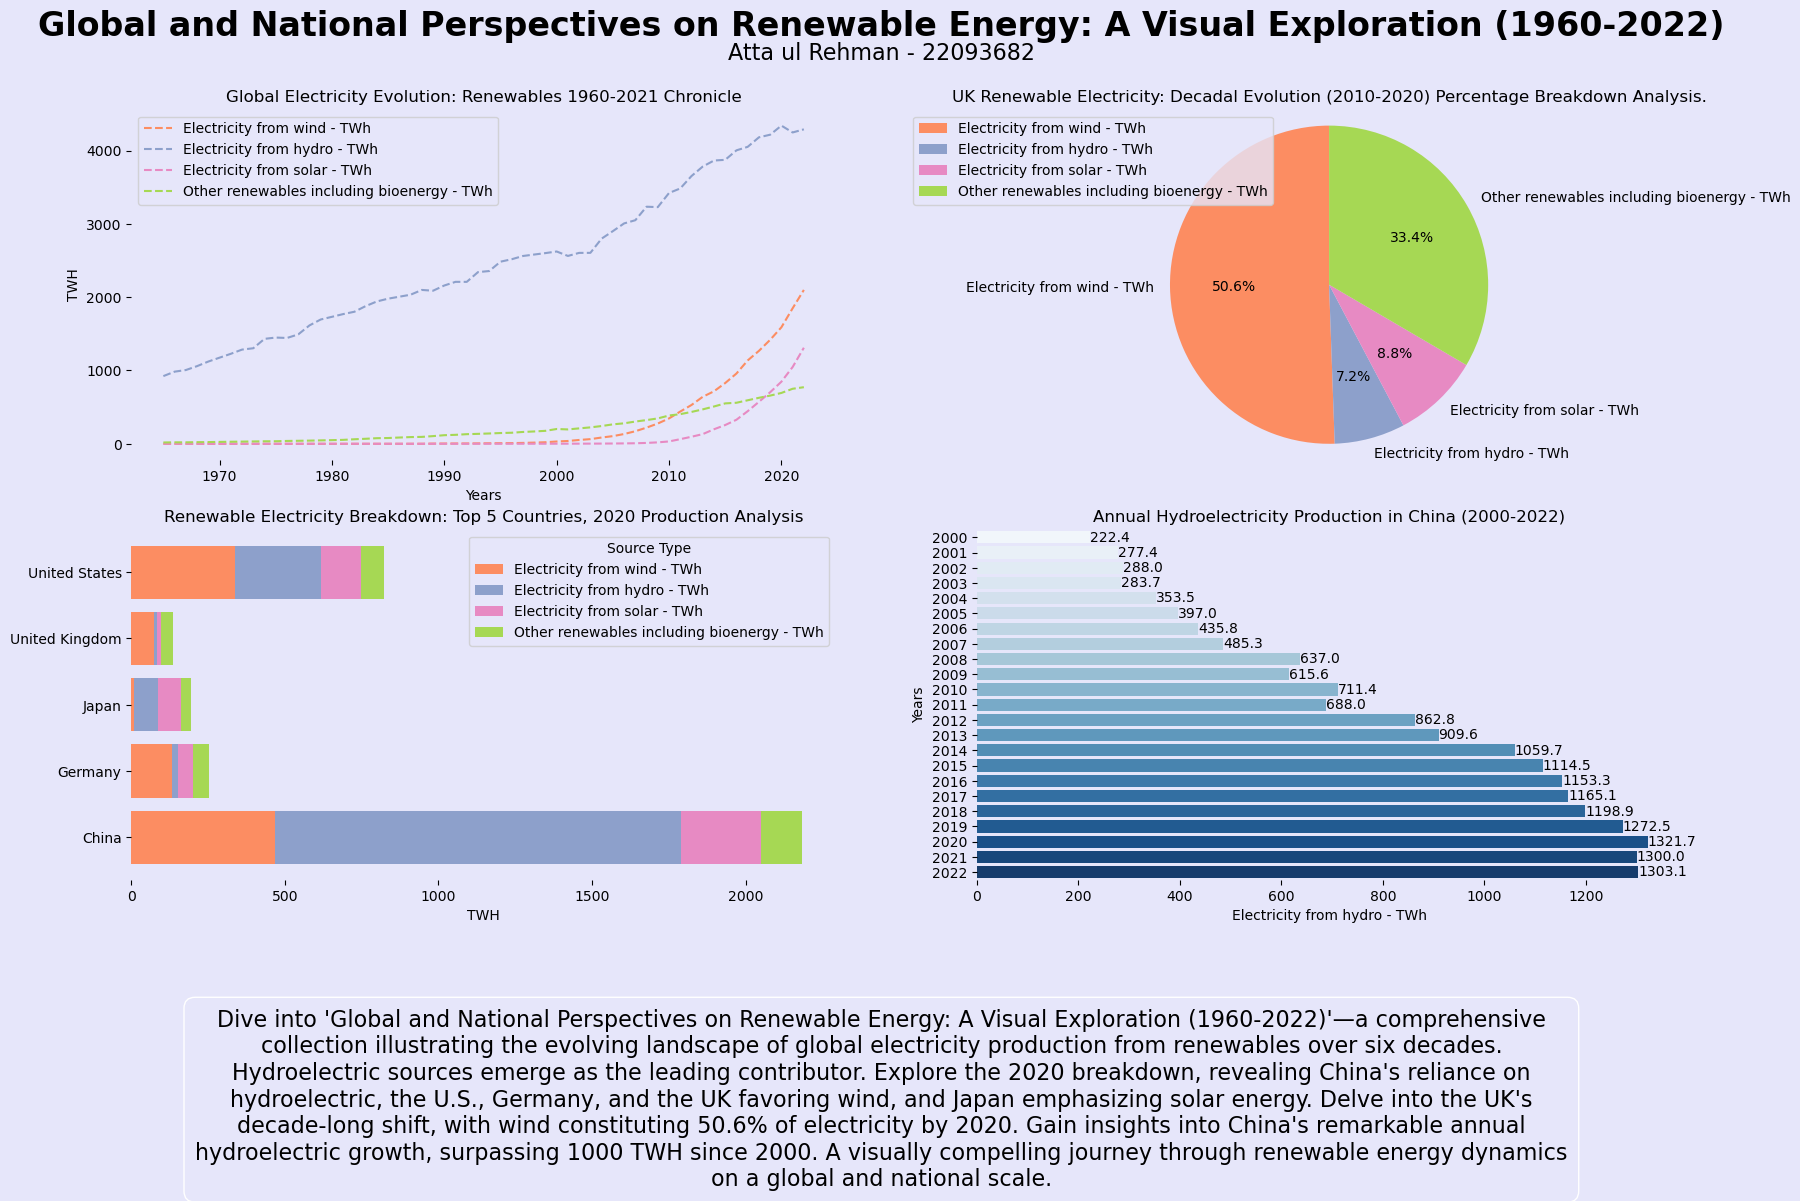

In [14]:



fig, axs = plt.subplots(2, 2, figsize=(20, 10))
# Ploting the Line Graph
s = 1
Types_Energy = list(modern_renewable_world.columns)[1:]
for i in Types_Energy:
    sns.lineplot(x=modern_renewable_world['Year'],
                 y=modern_renewable_world[i],
                 label=i,
                 ax=axs[0,
                        0],
                 linestyle='dashed',
                 color=sns.color_palette('Set2')[s])
    s += 1
# Setting Labels legends and their face color.
axs[0, 0].set_ylabel('TWH')
axs[0, 0].set_xlabel('Years')
axs[0, 0].set_facecolor('lavender')
axs[0, 0].legend(facecolor='lavender')
axs[0, 0].set_title(
    'Global Electricity Evolution: Renewables 1960-2021 Chronicle')


s = 1
for i, col in enumerate(modern_renewable_countries_2020.columns[1:]):
    axs[1,
        0].barh(modern_renewable_countries_2020['Entity'],
                modern_renewable_countries_2020[col],
                label=col,
                left=modern_renewable_countries_2020.iloc[:,
                                                          1:i + 1].sum(axis=1),
                color=sns.color_palette('Set2')[s])
    s += 1
axs[1, 0].legend(title='Source Type', facecolor='lavender')
axs[1, 0].set_xlabel('TWH')
axs[1, 0].set_facecolor('lavender')
axs[1, 0].set_title(
    'Renewable Electricity Breakdown: Top 5 Countries, 2020 Production Analysis')



axs[0,
    1].pie(values,
           labels=label,
           autopct='%1.1f%%',
           startangle=90,
           colors=[sns.color_palette("Set2")[1],
                   sns.color_palette("Set2")[2],
                   sns.color_palette("Set2")[3],
                   sns.color_palette("Set2")[4]],
           explode=explode)
# Add a circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axs[0, 1].set_facecolor('lavender')
axs[0, 1].legend(facecolor='lavender', loc='upper left',
                 bbox_to_anchor=(-0.1, 1))
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal to ensure a circular pie chart
axs[0, 1].axis('equal')

# Add a title
axs[0, 1].set_title(
    'UK Renewable Electricity: Decadal Evolution (2010-2020) Percentage Breakdown Analysis.')


axs[1,
    1] = sns.barplot(x=hydro_power_china['Electricity from hydro - TWh'],
                     y=str_list,
                     palette='Blues',
                     ax=axs[1,
                            1])
sns.despine(left=True, right=True, top=True, bottom=True)
rounded_values = [
    round(
        num,
        1) for num in list(
            hydro_power_china['Electricity from hydro - TWh'])]
str_values = [str(num) for num in rounded_values]
for index, value in enumerate(rounded_values):
    axs[1, 1].text(value, index, str(value),
                   ha='left', va='center', fontsize=10)
axs[1, 1].set_facecolor('lavender')
axs[1, 1].set_ylabel('Years')
axs[1, 1].set_title('Annual Hydroelectricity Production in China (2000-2022)')
fig.patch.set_facecolor('lavender')

# Adding the Title to Infographic
plt.suptitle(
    'Global and National Perspectives on Renewable Energy: A Visual Exploration (1960-2022)',
    fontsize=24,
    weight='bold')
plt.gcf().text(0.5, 0.93, 'Atta ul Rehman - 22093682', ha='center', fontsize=16)
# adding the Text to the Graphics
summary_text_lines = (
    "Dive into 'Global and National Perspectives on Renewable Energy: A Visual Exploration (1960-2022)'—a comprehensive\n"
    "collection illustrating the evolving landscape of global electricity production from renewables over six decades.\n"
    "Hydroelectric sources emerge as the leading contributor. Explore the 2020 breakdown, revealing China's reliance on\n"
    "hydroelectric, the U.S., Germany, and the UK favoring wind, and Japan emphasizing solar energy. Delve into the UK's\n"
    "decade-long shift, with wind constituting 50.6% of electricity by 2020. Gain insights into China's remarkable annual\n"
    "hydroelectric growth, surpassing 1000 TWH since 2000. A visually compelling journey through renewable energy dynamics\n"
    "on a global and national scale.")

fig.text(0.5, -0.11, summary_text_lines, ha="center", va="center", fontsize=16,
         bbox=dict(facecolor='lavender', edgecolor='white',
                   boxstyle='round,pad=0.5'))
# Saving the Picture of the graphics
plt.show()


